#RECURRENT MODEL APPROACH FOR HUMOR DETECTION: LSTM

# TEAM 3: Humor detection PREPARED
BY

Leyla Rocío Becerra Barajas lrbecerrab@unal.edu.co

Camilo Alfonso Mosquera Benavides camosquerab@unal.edu.co

Joan Gabriel Bofill Barrera jgbofillb@unal.edu.co

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [2]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel, linear_kernel, rbf_kernel, laplacian_kernel, chi2_kernel, cosine_similarity

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
import cv2 as cv
import json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [5]:
df

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


**Handling Missing Values**

Drop missing values, or fill them in with an automated workflow.

In [6]:
# get the number of missing data points per column (None)
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:2]

text     0
humor    0
dtype: int64

**Handling duplicated Values**




In [7]:
 df[df.duplicated(keep=False)]

,text,humor


In consequence, there are no duplicates in the dataset.

In [8]:
import re
import string 
cleanHumor = []
for i in range(len(df.humor)):
  my_str = df.iloc[i,0]
  my_new_string = re.sub('[^a-zA-Z0-9 \n\.]', '', my_str)
  my_new_string = my_new_string.lower()
  cleanHumor.append(my_new_string)
  

In [9]:
df.iloc[2,0]

'What do you call a turtle without its shell? dead.'

In [10]:
cleanHumorPD = pd.DataFrame(cleanHumor, columns=["textCleaned"], index=None)


In [11]:
cleanHumorPD2=pd.concat([cleanHumorPD, df], axis=1)
cleanHumorPD2

,textCleaned,text,humor
0,joe biden rules out 2020 bid guys im not running,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,watch darvish gave hitter whiplash with slow p...,Watch: darvish gave hitter whiplash with slow ...,False
2,what do you call a turtle without its shell dead.,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,5 reasons the 2016 election feels so personal,False
4,pasco police shot mexican migrant from behind ...,"Pasco police shot mexican migrant from behind,...",False
...,...,...,...
199995,conor maynard seamlessly fits oldschool rb hit...,Conor maynard seamlessly fits old-school r&b h...,False
199996,how to you make holy water you boil the hell o...,How to you make holy water? you boil the hell ...,True
199997,how many optometrists does it take to screw in...,How many optometrists does it take to screw in...,True
199998,mcdonalds will officially kick off allday brea...,Mcdonald's will officially kick off all-day br...,False


Searching for inconsistent values in the humor boolean column

In [12]:
df["humor"].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

In [13]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns
from sklearn import metrics
import contractions

In [15]:
def preprocess(df):
    
    X = []
    y = []
    #ps = PorterStemmer()
    #X = contractions.fix(df['text'])
    #y = np.where(df['humor'] == True, 1,0)
    for val in tqdm(np.array(df)):
        
        txt = contractions.fix(val[0])
        txt = txt.lower()
        #txt = txt.split()
        #print(len(txt))
        #txt = [ps.stem(word) for word in txt if not word in stopwords.words('english')]
        #txt = ' '.join(txt)
        
        X.append(txt)
        y.append(1 if val[1] == True else 0)
    
    
    return X, y

In [16]:
X, y = preprocess(df)

100%|██████████| 200000/200000 [00:03<00:00, 58664.56it/s]


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, stratify=y,train_size = 0.7)

X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, stratify=y_temp,train_size = 0.7)

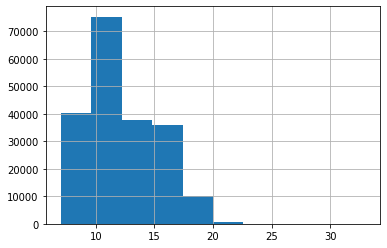

In [18]:
seq_len = [len(i.split()) for i in X]

pd.Series(seq_len).hist()

In [19]:
cntr = 0
for i in seq_len:
    if i <= 15:
        cntr+=1
        
cntr/len(seq_len)

0.83742

In [20]:
wrd = set()
for i in X_train:
    for j in i.split():
        wrd.add(j)
        
len(wrd)

115876

**Setting parameters for the tokenizer and applying on the training data.**



In [21]:
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [22]:
word_index = tokenizer.word_index

In [23]:
sent_length = 15
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded=pad_sequences(X_train_sequences,padding='post',maxlen=sent_length, truncating='post')

X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_val_padded=pad_sequences(X_val_sequences,padding='post',maxlen=sent_length, truncating='post')

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded=pad_sequences(X_test_sequences,padding='post',maxlen=sent_length, truncating='post')

**Fetching Glove Embeddings**

In [24]:
embeddings_index = {}
f = open('/content/drive/MyDrive/DataProyectoDS/glove.6B.100d.txt',encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:15, 25600.92it/s]

Found 400000 word vectors.


In [25]:
max_length = 100

embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

100%|██████████| 64789/64789 [00:00<00:00, 477993.85it/s]


**Setting up the model - Embedding Layer + basic Bi-Directional LSTM model**

In [26]:
embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=sent_length,
                            trainable=False)

In [27]:
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(128)),
    Dropout(0.2),
   Dense(1, activation='sigmoid')
])

In [28]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=METRICS)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           6479000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 6,713,753
Trainable params: 234,753
Non-trainable params: 6,479,000
_________________________________________________________________


In [30]:
y_tr = np.array(y_train).reshape(-1,1)
y_v = np.array(y_val).reshape(-1,1)
y_te = np.array(y_test).reshape(-1,1)

In [31]:
history = model.fit(X_train_padded,y_tr,validation_data=(X_val_padded,y_v),epochs=5,batch_size=64)

Epoch 1/5
2188/2188 [==============================] - 176s 78ms/step - loss: 0.2030 - accuracy: 0.9196 - precision: 0.9190 - recall: 0.9204 - val_loss: 0.1745 - val_accuracy: 0.9299 - val_precision: 0.9581 - val_recall: 0.8990
Epoch 2/5
2188/2188 [==============================] - 168s 77ms/step - loss: 0.1484 - accuracy: 0.9424 - precision: 0.9450 - recall: 0.9396 - val_loss: 0.1408 - val_accuracy: 0.9451 - val_precision: 0.9416 - val_recall: 0.9490
Epoch 3/5
2188/2188 [==============================] - 172s 79ms/step - loss: 0.1250 - accuracy: 0.9524 - precision: 0.9541 - recall: 0.9506 - val_loss: 0.1335 - val_accuracy: 0.9487 - val_precision: 0.9580 - val_recall: 0.9385
Epoch 4/5
2188/2188 [==============================] - 169s 77ms/step - loss: 0.1060 - accuracy: 0.9598 - precision: 0.9609 - recall: 0.9586 - val_loss: 0.1346 - val_accuracy: 0.9479 - val_precision: 0.9570 - val_recall: 0.9379
Epoch 5/5
2188/2188 [==============================] - 169s 77ms/step - loss: 0.0866 - a

**Predicting the values of test data and plotting the confusion matrix (Accuracy ~0.95)**



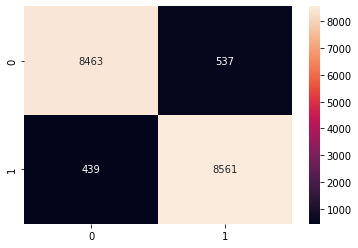

In [32]:
y_pred = model.predict(X_test_padded)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5,1,0)

cm_pred = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_pred,annot=True,fmt='g')

In [33]:
#@title matrix
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles, make_moons
from itertools import islice
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

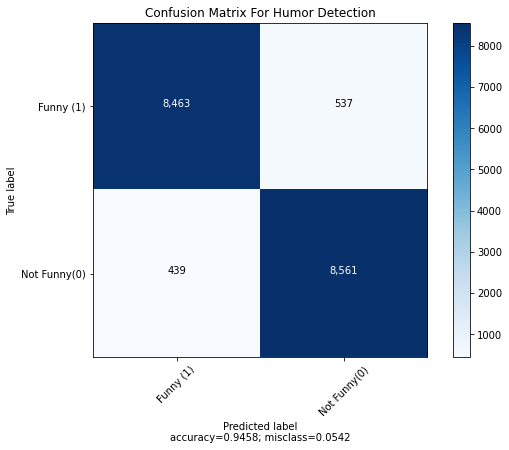

In [34]:
cmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cmat, 
normalize = False,
target_names = ["Funny (1)", "Not Funny(0)"],
title = "Confusion Matrix For Humor Detection")

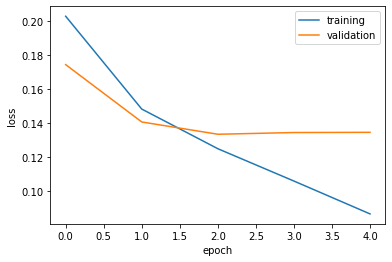

In [37]:
plt.plot(np.arange(5), history.history['loss'], label='training')
plt.plot(np.arange(5), history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

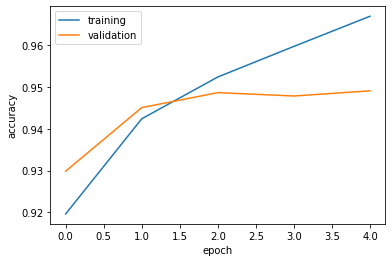

In [38]:
plt.plot(np.arange(5), history.history['accuracy'], label='training')
plt.plot(np.arange(5), history.history['val_accuracy'], label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

Other recurrent models and experiments

In [39]:
model2 = Sequential([
    embedding_layer,
    Bidirectional(GRU(128)), 
    #Bidirectional(LSTM(64)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [40]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=METRICS)

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           6479000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              176640    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 16)                4112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,659,769
Trainable params: 180,769
Non-trainable params: 6,479,000
______________________________________

In [42]:
model2.fit(X_train_padded,y_tr,validation_data=(X_val_padded,y_v),epochs=5,batch_size=64)

Epoch 1/5
2188/2188 [==============================] - 130s 57ms/step - loss: 0.2040 - accuracy: 0.9207 - precision: 0.9229 - recall: 0.9181 - val_loss: 0.1592 - val_accuracy: 0.9384 - val_precision: 0.9383 - val_recall: 0.9386
Epoch 2/5
2188/2188 [==============================] - 123s 56ms/step - loss: 0.1507 - accuracy: 0.9431 - precision: 0.9462 - recall: 0.9397 - val_loss: 0.1550 - val_accuracy: 0.9382 - val_precision: 0.9159 - val_recall: 0.9650
Epoch 3/5
2188/2188 [==============================] - 121s 55ms/step - loss: 0.1248 - accuracy: 0.9536 - precision: 0.9564 - recall: 0.9505 - val_loss: 0.1324 - val_accuracy: 0.9494 - val_precision: 0.9537 - val_recall: 0.9446
Epoch 4/5
2188/2188 [==============================] - 124s 57ms/step - loss: 0.1035 - accuracy: 0.9617 - precision: 0.9635 - recall: 0.9598 - val_loss: 0.1364 - val_accuracy: 0.9501 - val_precision: 0.9524 - val_recall: 0.9476
Epoch 5/5
2188/2188 [==============================] - 124s 57ms/step - loss: 0.0825 - a

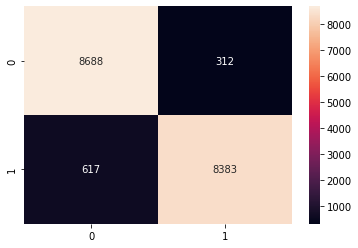

In [43]:
y_pred2 = model2.predict(X_test_padded)
y_pred2 = y_pred2.flatten()
y_pred2 = np.where(y_pred2 > 0.5,1,0)

cm_pred2 = metrics.confusion_matrix(y_test, y_pred2)
sns.heatmap(cm_pred2,annot=True,fmt='g')

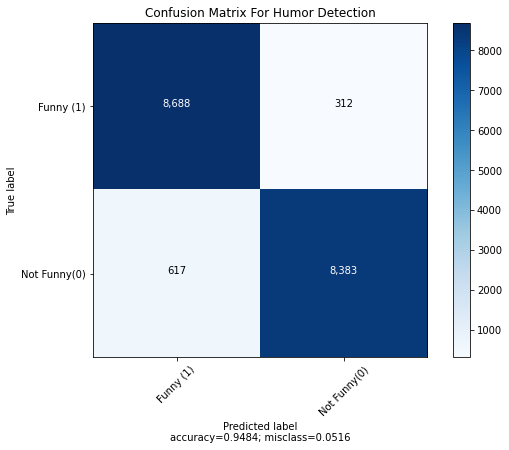

In [44]:
cmat2 = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(cm = cmat2, 
normalize = False,
target_names = ["Funny (1)", "Not Funny(0)"],
title = "Confusion Matrix For Humor Detection")